In [4]:
from langchain_core.messages import AnyMessage, HumanMessage
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages

class MessageState(TypedDict):
    messages:Annotated[list[AnyMessage], add_messages]



In [5]:
from langgraph.graph import MessagesState

class MessageState(MessagesState):
    pass

In [6]:
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="deepseek-r1:latest",
    temperature=0,
    # other params...
)

In [7]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

llm_with_tools = llm.bind_tools([multiply])

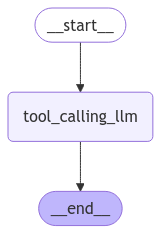

In [8]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
    
# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
messages = graph.invoke({"messages": HumanMessage(content="Hello!")})
for m in messages['messages']:
    m.pretty_print()

ResponseError: registry.ollama.ai/library/deepseek-r1:latest does not support tools (status code: 400)